# 3. 신경망

> 이번장에서 배운 내용
> * __활성화 함수__
> * Numpy의 다차원 배열을 이용한 신경망의 효율적 구현(이는 기본 개념이므로 아래 정리에서는 생략)
> * Batch 개념

----

## 신경망의 예

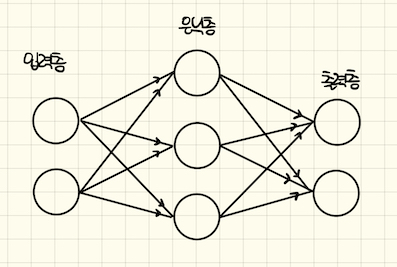

---

## 퍼셉트론

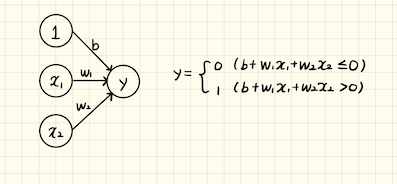

* b: 편향을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화되느냐를 제어
* w1, w2: 각 신호의 가중치를 나타내는 매개변수로, 각 신호의 영향력을 제어

---

## 활성화 함수

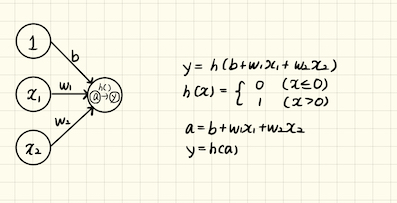

* 위의 h(x) 함수는 활성화 함수
* 활성화 함수(activation function): 입력 신호의 총합을 출력 신호로 변환하는 함수
* 퍼셉트론과 신경망의 주된 차이는 활성화 함수

### 종류

1. 계단 함수(step function)

In [3]:
# 단순 구현
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

# Numpy 배열 지원하도록 구현
def step_function(x):
    y = x > 0
    return y.astype(np.int)

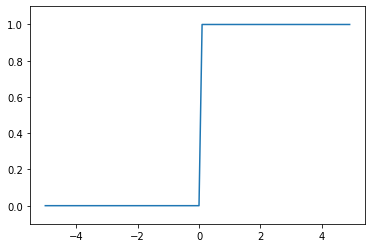

In [4]:
# 계단 함수 시각화
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

2. 시그모이드 함수(sigmoid function)

* sigmoid는 S자 모양이라는 뜻

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
# Numpy 배열도 처리 가능
# Numpy의 브로드캐스트 기능 덕분
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

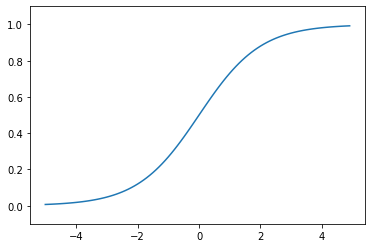

In [9]:
# 시그모이드 함수 시각화
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

< 차이점 >
* 시그모이드 함수와 계단 함수를 비교하면, '매끄러움'의 차이
* 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화
* 퍼센트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐름

< 공통점 >
* 두 함수의 공통점으로는 비슷한 모양, 둘 다 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 1에 가까워지는 구조
* 입력이 아무리 작거나 커도 출력은 0에서 1 사이라는 것도 둘의 공통점
* __비선형함수__
* 신경망에서는 활성화 함수로 비선형 함수를 사용해야 함, 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문

3. ReLU 함수(rectified linear unit function)

* ReLU 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수

In [10]:
def relu(x):
    return np.maximum(0, x)

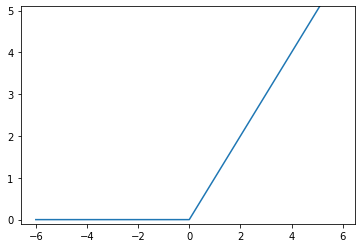

In [12]:
# ReLU 함수 시각화
x = np.arange(-6.0, 6.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.1)
plt.show()

---

## 3층 신경망 구현하기

In [14]:
# 입력층에서 1층으로 신호 전달
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [15]:
# 활성화 함수
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [19]:
# 1층에서 2층으로의 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [18]:
# 2층에서 출력층으로의 신호 전달
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [20]:
# 위의 구현을 다시 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


---

## 출력층 설계하기

* 신경망은 분류와 회귀 모두에 이용 가능
* 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라짐
* 일반적으로 회귀에는 항등함수, 이진분류에는 시그모이드 함수, 다중분류에는 소프트맥스 함수

1. 항등함수

* 입력을 그대로 출력

2. 소프트맥스 함수(softmax function) 

* exp(x)는 e^x를 뜻하는 지수함수(exponential function), e는 자연상수
* n은 출력층의 뉴런 수, yk는 그중 k번째 출력
* 소프트맥스 함수의 분자는 입력 신호 ak의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합

In [21]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [22]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [23]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


* 위의 코드는 소프트맥스 함수의 식을 제대로 표현하고 있지만, overflow 문제를 가지고 있음
* overflow 문제란, 컴퓨터는 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없다는 것
* 소프트맥스 함수는 지수 함수를 사용하는데, 이는 쉽게 아주 큰 값을 내뱉음
* 이는 결과 수치가 불안정해지는 문제를 야기하기 때문에, 아래와 같은 개선이 필요함

* 어떠한 정수를 더해도(빼도) 결과는 바뀌지 않는다는 것을 이용
* overflow를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적

In [24]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 제대로 계산이 되지 않음

/Users/yaelinjo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/yaelinjo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [25]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [26]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [27]:
# 위를 바탕으로 소프트맥스 함수를 다시 구현
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [28]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


* 소프트맥스 함수의 출력은 0과 1 사이의 실수
* 소프트맥스 함수 출력의 총합은 1
* __확률__로 해석 가능
* 지수함수가 단조 증가 함수이기 때문에, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않음
* 현업에서 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략하는 것이 일반적
* 한편, 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수를 사용

* 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 함
* 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적

---

## MNIST 데이터 예제

* 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고 추론 과정만 구현
* 이를 신경망의 순전파(forward propagation)이라고 함

### 데이터셋 확인

In [36]:
from master.dataset.mnist import load_mnist
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 신경망의 추론 처리

* 입력층 뉴런을 784개, 왜냐하면 이미지 크기가 28*28=784이기 때문
* 출력층 뉴런을 10개, 왜냐하면 0에서 9까지의 숫자를 구분하는 문제이기 때문
* 은닉층은 총 두 개, 첫 번째 은닉층은 50개 뉴런, 두 번째 은닉층은 100개 뉴런(임의로 정한 값)

In [41]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    import pickle
    with open('./master/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [42]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스
    if p == t[i]:
        accuracy_cnt += 1
        
print('Accuracy:' + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 배치 처리

* 하나로 묶은 입력 데이터를 배치(batch)라 함
* 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있기에, 배치 처리가 유리

In [56]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print('Accuracy:' + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


#밑바닥부터시작하는딥러닝 #퍼셉트론 #신경망 #활성화함수